In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/Term 2/MBAN 5110/data_set_hackathon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


In [4]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001
...,...,...,...,...,...,...,...,...,...,...,...
2415,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003
2416,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003
2417,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003
2418,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003


In [5]:
df['items'] = pd.to_numeric(df['items'], errors='coerce')
# Convert Order Date and Requested Delivery Date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y')
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'], format='%d.%m.%Y')

# Calculate the lead time
df['lead_time'] = (df['requested_delivery_date'] - df['order_date']).dt.days

In [6]:
#Drop duplicate numbers if the dataset has.
df.drop_duplicates(inplace=True)

In [7]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,lead_time
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6.0,RU0001,199
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23.0,RU0001,252
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7.0,RU0001,203
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9.0,RU0001,202
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5.0,RU0001,195
...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12.0,FI0003,217
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12.0,FI0003,217
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12.0,FI0003,217
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10.0,FI0003,217


<Axes: xlabel='month'>

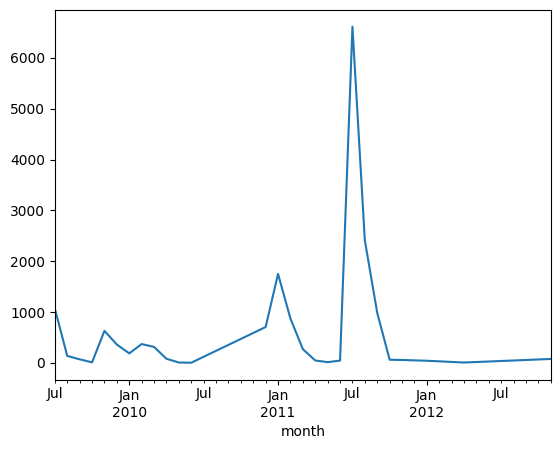

In [8]:
df['month'] = df['order_date'].dt.to_period('M')
monthly_demand = df.groupby('month')['items'].sum()
monthly_demand.plot()

In [9]:
historical_orders = df.groupby(['Customer Country Code', 'month']).size()
historical_orders.head()

Customer Country Code  month  
AD                     2011-09    13
                       2011-10     1
AT                     2010-01     1
                       2010-02     1
                       2010-03    11
dtype: int64

In [10]:
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

In [11]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,lead_time,month,year
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6.0,RU0001,199,7,2009
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23.0,RU0001,252,7,2009
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7.0,RU0001,203,7,2009
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9.0,RU0001,202,7,2009
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5.0,RU0001,195,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12.0,FI0003,217,7,2011
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12.0,FI0003,217,7,2011
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12.0,FI0003,217,7,2011
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10.0,FI0003,217,7,2011


In [12]:
df['price'] = df['value'] / df['items']

In [13]:
df['Product Code'].unique()

array(['L10705000', 'L10705100', 'L10705200', 'L10705300', 'L10705400',
       'L10705500', 'L10705600', 'L10705700', 'L10850600', 'L10850700',
       'L10850800', 'L10850900', 'L10852800', 'L10852900', 'L10853100',
       'L12134400', 'L12134500', 'L12134600', 'L12134700', 'L12135800',
       'L12135900', 'L12136000', 'L12136100', 'L12916800', 'L12916900',
       'L12917000', 'L12917100', 'L12917700', 'L12917800', 'L12917900',
       'L12918000', 'L12918400', 'L12918500', 'L12918600', 'L12918700',
       'L12918800', 'L12918900', 'L12919000', 'L12919100', 'L12919200'],
      dtype=object)

In [14]:
codes, uniques = pd.factorize(df['Product Code'])
df['Product Code Mapped'] = codes + 1

In [15]:
df['Product Code Mapped']

0        1
1        1
2        1
3        1
4        1
        ..
2415    40
2416    40
2417    40
2418    40
2419    40
Name: Product Code Mapped, Length: 2417, dtype: int64

In [16]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,lead_time,month,year,price,Product Code Mapped
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6.0,RU0001,199,7,2009,389.50,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23.0,RU0001,252,7,2009,441.75,1
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7.0,RU0001,203,7,2009,427.50,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9.0,RU0001,202,7,2009,451.25,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5.0,RU0001,195,7,2009,441.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12.0,FI0003,217,7,2011,10.71,40
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12.0,FI0003,217,7,2011,10.71,40
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12.0,FI0003,217,7,2011,10.71,40
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10.0,FI0003,217,7,2011,10.71,40


In [17]:
# Filter orders with a lead time of more than 30 days (advance demand)
advance_demand_df = df[df['lead_time'] > 30]

In [18]:
advance_demand_df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,lead_time,month,year,price,Product Code Mapped
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6.0,RU0001,199,7,2009,389.50,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23.0,RU0001,252,7,2009,441.75,1
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7.0,RU0001,203,7,2009,427.50,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9.0,RU0001,202,7,2009,451.25,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5.0,RU0001,195,7,2009,441.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12.0,FI0003,217,7,2011,10.71,40
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12.0,FI0003,217,7,2011,10.71,40
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12.0,FI0003,217,7,2011,10.71,40
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10.0,FI0003,217,7,2011,10.71,40


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 0 to 2419
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2417 non-null   datetime64[ns]
 1   requested_delivery_date  2417 non-null   datetime64[ns]
 2   Customer Country Code    2417 non-null   object        
 3   Product Code             2417 non-null   object        
 4   Description              2417 non-null   object        
 5   order_type               2417 non-null   object        
 6   Customer Order Code      2417 non-null   int64         
 7   value                    2417 non-null   float64       
 8   Curr                     2417 non-null   object        
 9   items                    2072 non-null   float64       
 10  Route                    2417 non-null   object        
 11  lead_time                2417 non-null   int64         
 12  month                    2417 non-null 

In [20]:
df = df.dropna(subset=['items', 'price'])

In [21]:
advance_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 0 to 2419
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2392 non-null   datetime64[ns]
 1   requested_delivery_date  2392 non-null   datetime64[ns]
 2   Customer Country Code    2392 non-null   object        
 3   Product Code             2392 non-null   object        
 4   Description              2392 non-null   object        
 5   order_type               2392 non-null   object        
 6   Customer Order Code      2392 non-null   int64         
 7   value                    2392 non-null   float64       
 8   Curr                     2392 non-null   object        
 9   items                    2047 non-null   float64       
 10  Route                    2392 non-null   object        
 11  lead_time                2392 non-null   int64         
 12  month                    2392 non-null 

In [22]:
advance_demand_df = advance_demand_df.dropna(subset=['items', 'price'])

In [23]:
# Prepare data for logistic regression
X = advance_demand_df[['price', 'month','year']]  # example features
y = advance_demand_df['Product Code Mapped']  # target variable

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict choice probabilities
predicted_probabilities = model.predict_proba(X_test)

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
predicted_probabilities

array([[0.00553049, 0.00023304, 0.00016668, ..., 0.05423832, 0.01849044,
        0.05254942],
       [0.01154   , 0.000841  , 0.00078695, ..., 0.06158198, 0.02707922,
        0.05488765],
       [0.00551778, 0.00023216, 0.00016579, ..., 0.05470166, 0.01850819,
        0.05301744],
       ...,
       [0.00562461, 0.00023941, 0.0001721 , ..., 0.05456141, 0.01868365,
        0.05278034],
       [0.00538005, 0.00022387, 0.00015907, ..., 0.05276772, 0.01808707,
        0.05125547],
       [0.03338063, 0.01015305, 0.01918587, ..., 0.03861785, 0.03145286,
        0.02761283]])

In [26]:
advance_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2047 entries, 0 to 2419
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2047 non-null   datetime64[ns]
 1   requested_delivery_date  2047 non-null   datetime64[ns]
 2   Customer Country Code    2047 non-null   object        
 3   Product Code             2047 non-null   object        
 4   Description              2047 non-null   object        
 5   order_type               2047 non-null   object        
 6   Customer Order Code      2047 non-null   int64         
 7   value                    2047 non-null   float64       
 8   Curr                     2047 non-null   object        
 9   items                    2047 non-null   float64       
 10  Route                    2047 non-null   object        
 11  lead_time                2047 non-null   int64         
 12  month                    2047 non-null 

In [28]:
import statsmodels.api as sm

# Assuming `df` is your DataFrame and you have a 'Date' column and a 'Demand' column
advance_demand_df['Order Date'] = pd.to_datetime(advance_demand_df['Order Date'])
advance_demand_df.set_index('Order Date', inplace=True)

# Let's assume a monthly time series, hence 'M'
advance_demand_df = advance_demand_df.resample('M').sum()

# Define the parameters for the SARIMA model
# These should be chosen based on model diagnostics and ACF/PACF plots
p = 1 # Autoregressive term
d = 1 # Differencing
q = 1 # Moving average term
P = 1 # Seasonal autoregressive term
D = 1 # Seasonal differencing
Q = 1 # Seasonal moving average term
s = 12 # Seasonal periodicity 

# Build and fit the SARIMA model
sarima_model = SARIMAX(advance_demand_df['items'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Summarize the model results
print(sarima_results.summary())

# Perform diagnostics to check for any unusual behavior
sarima_results.plot_diagnostics(figsize=(15, 12))

# Forecast for the next period
forecast = sarima_results.get_forecast(steps=12)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = sarima_results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

# Plot the forecast alongside historical data
pd.concat([advance_demand_df['items'], forecast_df['Forecast']], axis=1).plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'